# Economic freedom after Covid-19

**Background**: The pandemic has affected freedoms across the globe: lockdowns have prevented people movements, trade has grounded to a halt as businesses closed shop. As the global economy reopens, what factors would help different countries attract investments?

**Journalistic question**: What would help drive an increase in business freedom post-pandemic?

**Design**: This story analyzes the Economic Freedom Index of the Heritage Foundation, which showed a decline in economic freedom across the board from 2017 to 2022. To better concentrate on the subject matter of attracting investments and business, we specifically used the sub-indices of **business freedom, government integrity, judicial effectiveness and property rights**. 

The definitions of these subindices are available on the Economic Freedom Index [website](https://www.heritage.org/index/about). 

**Methodology**: We ran both a linear and fixed-effects regression model on the three subindices we selected. The fixed-effects model is a regression specifically designed for panel data, which controls for time variance. 

Due to technical difficulties in running the fixed-effects model in Python, our fixed-effects model result can be found in a **separate R file** in our repository.

**Case study**: Part of our story is a case study of **Cuba**, which bucked a general declining trend in economic freedom during the height of the pandemic.

## Do your imports

In [ ]:
import pandas as pd
from plotnine import *
import seaborn as sns
import statsmodels.formula.api as smf

## Read through the data

The data here is from the Heritage Foundation's Economic Freedom Index. You can find latest updates and more details about the data [here](https://www.heritage.org/index/ranking).

In [38]:
df= pd.read_csv('data.csv')
df

,Name,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,Afghanistan,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0
2,Algeria,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0
3,Angola,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0
4,Argentina,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5147,Venezuela,1995,59.8,50.0,10.0,NaN,80.0,76.1,NaN,85.0,NaN,52.0,65.0,50.0,70.0
5148,Vietnam,1995,41.7,10.0,10.0,NaN,68.8,87.1,NaN,40.0,NaN,55.2,44.6,30.0,30.0
5149,Yemen,1995,49.8,30.0,10.0,NaN,78.2,73.4,NaN,70.0,NaN,41.8,45.0,70.0,30.0
5150,Zambia,1995,55.1,50.0,30.0,NaN,72.4,74.8,NaN,55.0,NaN,12.2,61.2,70.0,70.0


## Clean the data

To better analyze the data, we remove some of the null values in the dataset. The null values are expected since every year, the number of countries included in the index vary, although not widely. 

We also clean the data by removing whitespaces, and having uniform indicators (i.e. lowercase names for columns) for better processing.

### Lowercase the columns and remove spaces

In [39]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")

### Check for null values

Some countries were not included in the survey in some years.

In [40]:
df.isna().sum()

name                         0
index_year                   0
overall_score              534
property_rights            497
government_integrity       481
judicial_effectiveness    4053
tax_burden                 518
government_spending        502
fiscal_health             4060
business_freedom           485
labor_freedom             1979
monetary_freedom           496
trade_freedom              511
investment_freedom         496
financial_freedom          518
dtype: int64

### Examine data types

In [41]:
df.dtypes

name                       object
index_year                  int64
overall_score             float64
property_rights           float64
government_integrity      float64
judicial_effectiveness    float64
tax_burden                float64
government_spending       float64
fiscal_health             float64
business_freedom          float64
labor_freedom             float64
monetary_freedom          float64
trade_freedom             float64
investment_freedom        float64
financial_freedom         float64
dtype: object

### Remove null values

In [42]:
df = df.dropna()

### Examine data

In [43]:
df.index_year.unique()

array([2022, 2021, 2020, 2019, 2018, 2017])

## Explore the data

In here, we do our initial analysis of the data by looking at summary statistics.

In [44]:
df.describe().round(1)

,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
count,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0,1075.0
mean,2019.5,61.0,54.2,43.9,46.8,77.3,65.1,67.4,63.6,58.8,75.4,73.5,57.4,48.5
std,1.7,11.2,20.1,20.1,20.8,13.3,23.1,30.7,15.7,14.0,11.6,12.6,21.9,19.1
min,2017.0,3.0,0.2,3.8,3.9,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0
25%,2018.0,54.1,38.8,29.6,31.3,70.9,53.0,51.1,54.6,50.3,72.1,66.0,45.0,30.0
50%,2019.0,61.0,52.4,38.6,44.3,78.7,70.2,79.2,64.0,58.9,77.7,75.4,60.0,50.0
75%,2021.0,68.3,68.1,53.2,60.4,86.0,83.7,92.2,74.9,67.5,82.0,83.5,75.0,60.0
max,2022.0,90.2,100.0,99.5,98.0,100.0,97.0,100.0,96.4,92.6,91.7,95.0,95.0,90.0


In [45]:
df.corr().round(1)

,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom
index_year,1.0,-0.0,0.1,0.1,0.1,0.0,0.0,-0.0,-0.1,-0.1,-0.1,-0.2,-0.0,0.0
overall_score,-0.0,1.0,0.8,0.8,0.8,0.1,-0.0,0.5,0.8,0.6,0.7,0.7,0.8,0.8
property_rights,0.1,0.8,1.0,0.9,0.8,-0.1,-0.3,0.2,0.8,0.4,0.5,0.6,0.7,0.7
government_integrity,0.1,0.8,0.9,1.0,0.8,-0.2,-0.4,0.2,0.7,0.4,0.4,0.5,0.6,0.7
judicial_effectiveness,0.1,0.8,0.8,0.8,1.0,-0.2,-0.3,0.2,0.7,0.4,0.4,0.5,0.6,0.6
tax_burden,0.0,0.1,-0.1,-0.2,-0.2,1.0,0.4,0.1,0.1,0.2,0.1,0.2,-0.1,-0.0
government_spending,0.0,-0.0,-0.3,-0.4,-0.3,0.4,1.0,0.1,-0.2,-0.0,-0.1,-0.2,-0.1,-0.2
fiscal_health,-0.0,0.5,0.2,0.2,0.2,0.1,0.1,1.0,0.2,0.2,0.3,0.3,0.2,0.2
business_freedom,-0.1,0.8,0.8,0.7,0.7,0.1,-0.2,0.2,1.0,0.5,0.5,0.6,0.5,0.6
labor_freedom,-0.1,0.6,0.4,0.4,0.4,0.2,-0.0,0.2,0.5,1.0,0.4,0.4,0.3,0.3


## Plots: broad strokes

Below are some plotting we did for the index data to better appreciate the data. 

First, we plot the entire dataset. This one's using the entire dataset to show the relationship between government integrity and business freedom.

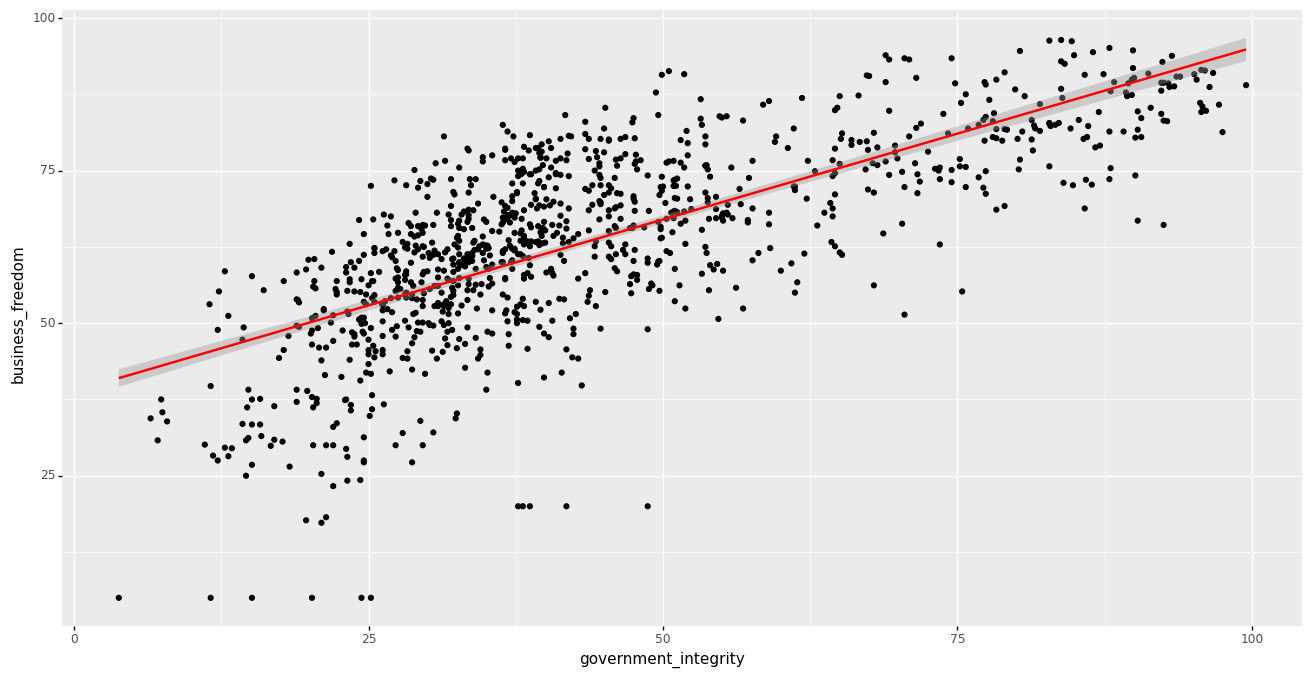

<ggplot: (309534183)>

In [46]:
(
    ggplot(df, aes(x='government_integrity', y='business_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') +
        theme(figure_size=(16,8))
)

This one's with property rights as **X** and business freedom as **Y**.

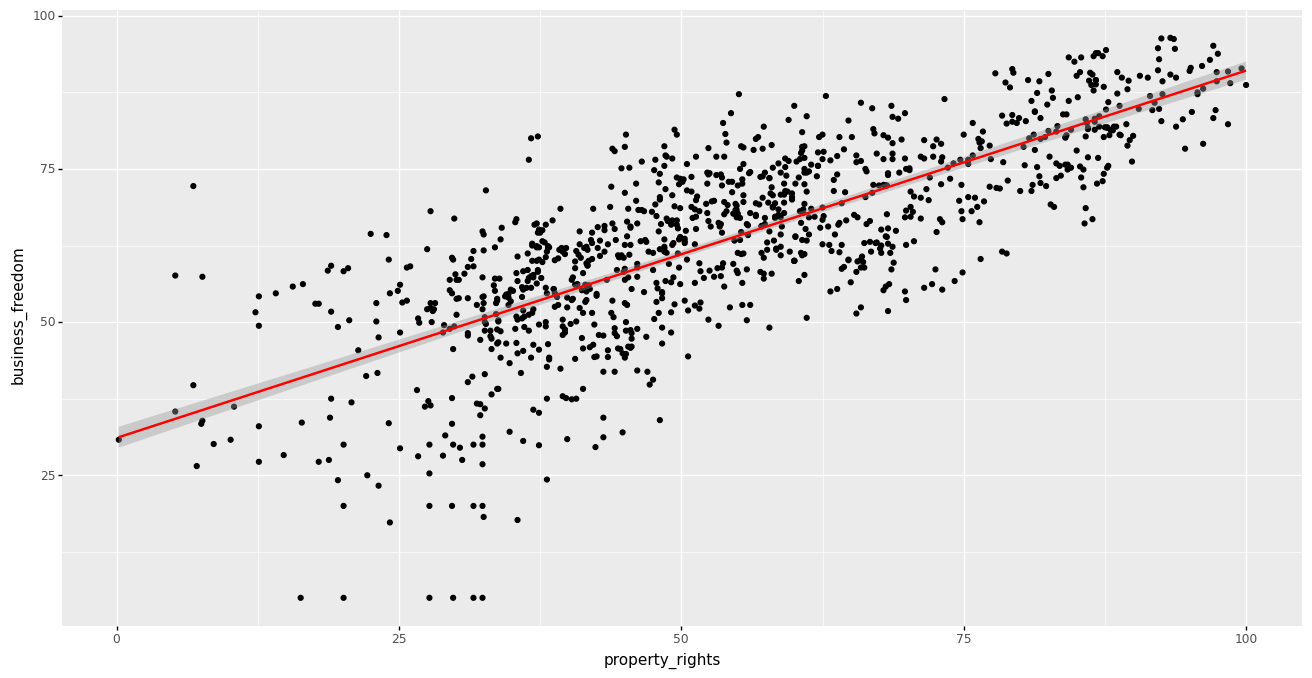

<ggplot: (309196918)>

In [47]:
(
    ggplot(df, aes(x='property_rights', y='business_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') + 
        theme(figure_size=(16,8))
)

And then finally between **judicial effectiveness** and **business freedom**.

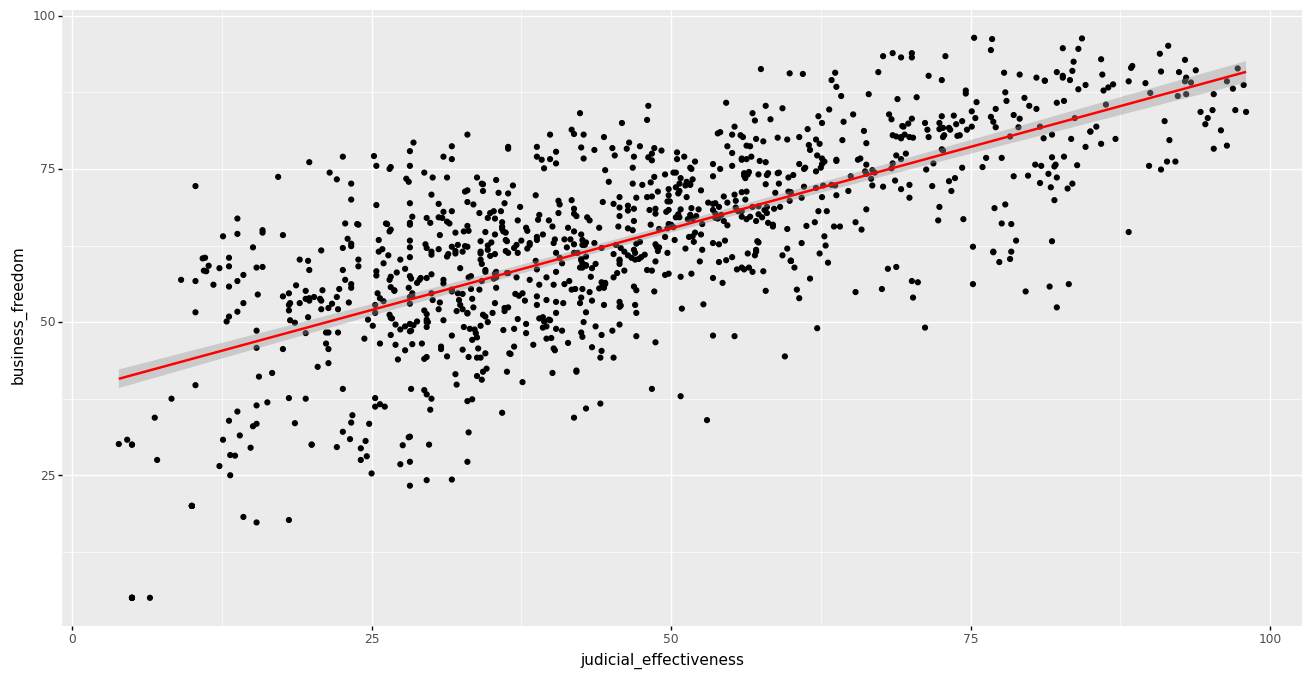

<ggplot: (308446172)>

In [48]:
(
    ggplot(df, aes(x='judicial_effectiveness', y='business_freedom')) +
        geom_point() +
        geom_smooth(method='lm', color='red') + 
        theme(figure_size=(16,8))
)

## Plots: digging deeper

And then we dig deeper.

The **first** one below is just a scatter plot of **business freedom** and **government integrity** in annual basis to show their relationship. In here, it showed a direct relationship between the two subindices.

The **second** one is between **business freedom** and **property rights** with the same findings. And the **third** one is with **judicial effectiveness**.

We analyzed these three because based on the plots above, they appear to show a linear relationship with **business freedom**.

We marked some specific countries with notable scores of less than 35 in business freedom in the index, which showed those lagging behind in rankings.

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


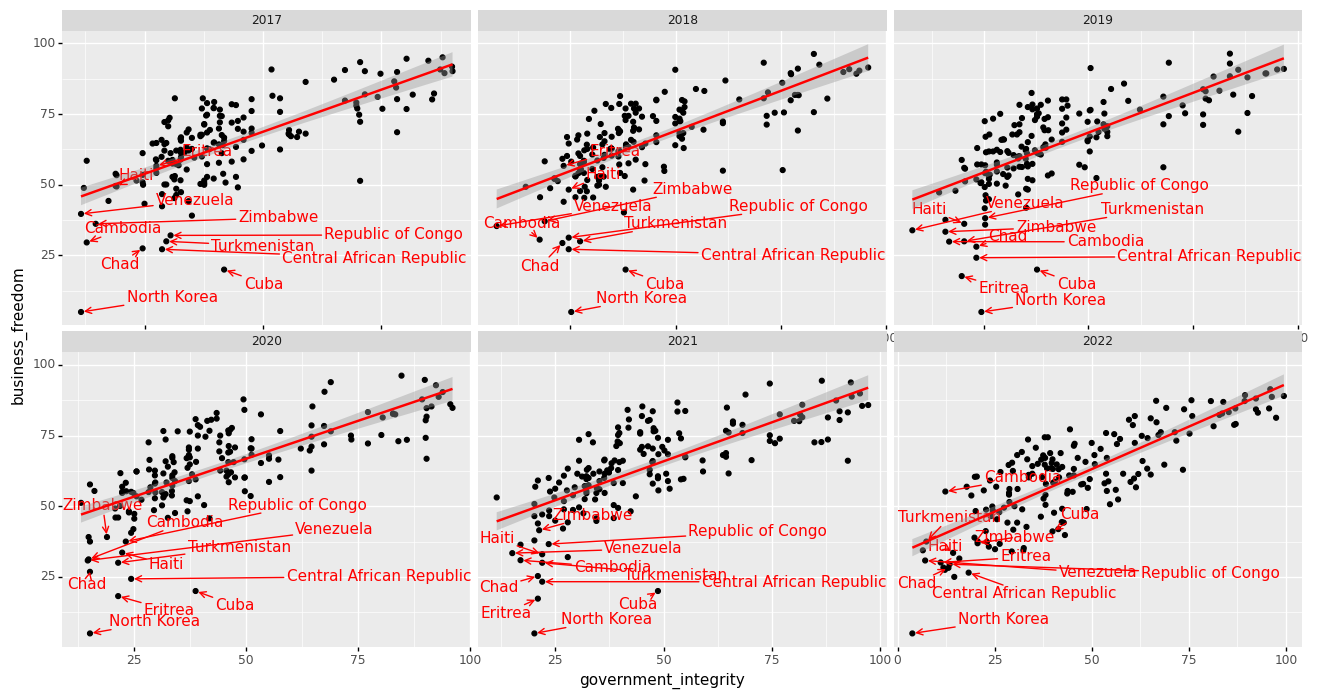

<ggplot: (308883910)>

In [49]:
countries_to_highlight = df.query('business_freedom  < 35 and index_year < 2021').name.unique()
# to_highlight = df.query('business_freedom  < 35 and index_year < 2021')
to_highlight = df.query('name.isin(@countries_to_highlight)')

adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '->',
        'color': 'red'
    }
}


(
    ggplot(df, aes(x='government_integrity', y='business_freedom')) +
        geom_point() +
        geom_text(aes(label='name'), data = to_highlight, color='red', adjust_text=adjust_text_dict) +
        geom_smooth(method='lm', color='red') +
        facet_wrap('index_year', scales='free_x') + 
        theme(figure_size=(16,8))
)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


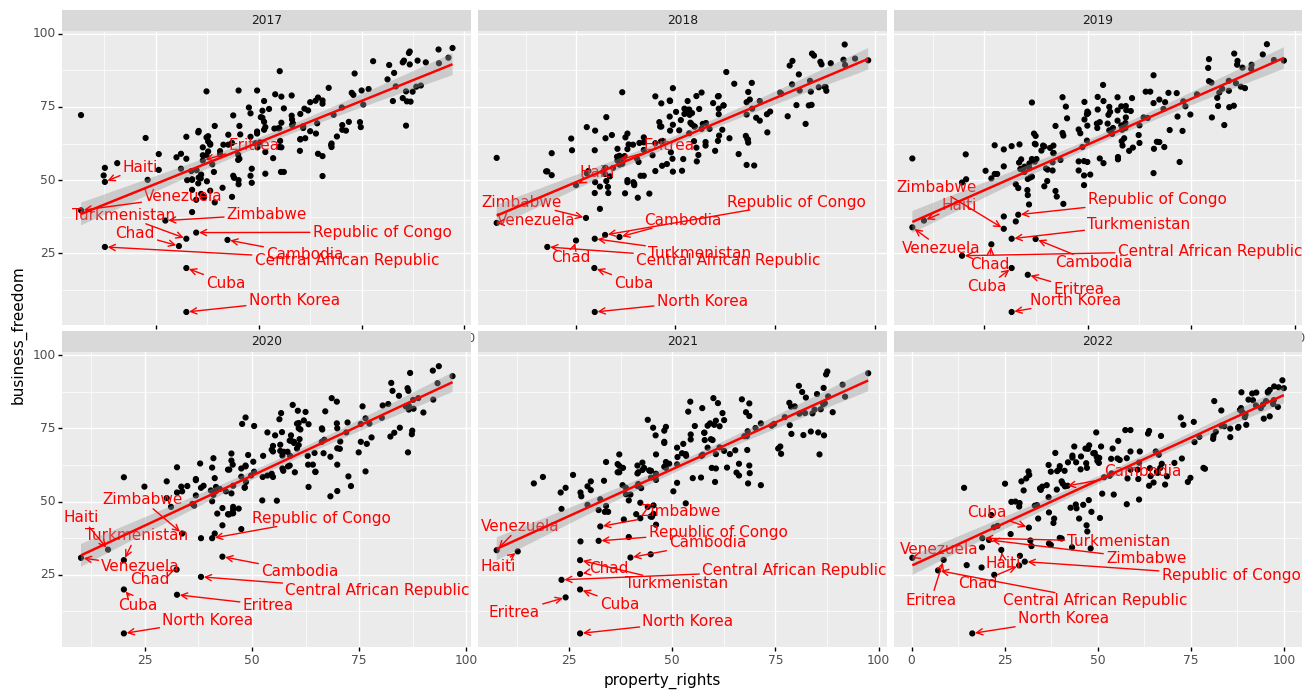

<ggplot: (309266853)>

In [50]:
countries_to_highlight = df.query('business_freedom  < 35 and index_year < 2021').name.unique()
# to_highlight = df.query('business_freedom  < 35 and index_year < 2021')
to_highlight = df.query('name.isin(@countries_to_highlight)')

adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '->',
        'color': 'red'
    }
}


(
    ggplot(df, aes(x='property_rights', y='business_freedom')) +
        geom_point() +
        geom_text(aes(label='name'), data = to_highlight, color='red', adjust_text=adjust_text_dict) +
        geom_smooth(method='lm', color='red') +
        facet_wrap('index_year', scales='free_x') + 
        theme(figure_size=(16,8))
)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/plotnine/facets/facet.py:396: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'


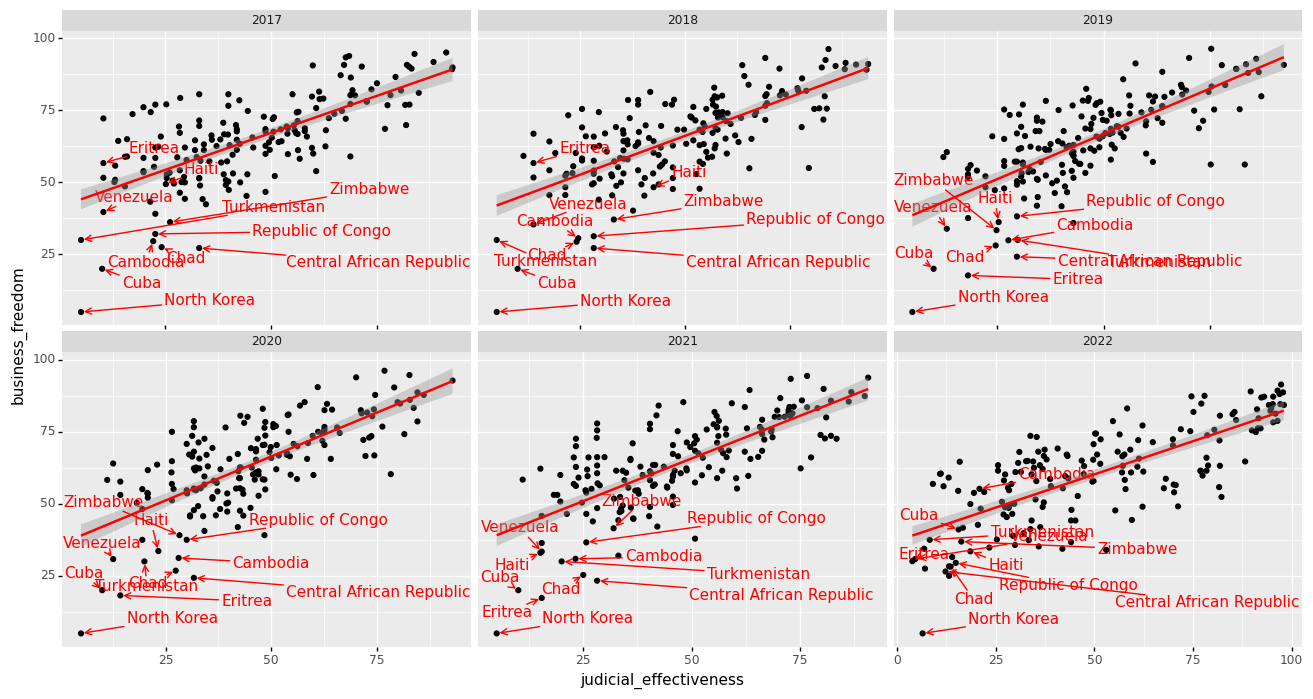

<ggplot: (309721383)>

In [51]:
countries_to_highlight = df.query('business_freedom  < 35 and index_year < 2021').name.unique()
# to_highlight = df.query('business_freedom  < 35 and index_year < 2021')
to_highlight = df.query('name.isin(@countries_to_highlight)')

adjust_text_dict = {
    'expand_points': (2, 2),
    'arrowprops': {
        'arrowstyle': '->',
        'color': 'red'
    }
}


(
    ggplot(df, aes(x='judicial_effectiveness', y='business_freedom')) +
        geom_point() +
        geom_text(aes(label='name'), data = to_highlight, color='red', adjust_text=adjust_text_dict) +
        geom_smooth(method='lm', color='red') +
        facet_wrap('index_year', scales='free_x') + 
        theme(figure_size=(16,8))
)

So far, we looked at three subindices and how they relate to business freedom. The plots show that they appear to have a linear relationship. We verify this on our regression models later.

### Examining the difference

The table below examines the difference in scores across the three subindices we selected. This examination helped us determine specific countries which showed notable movements that in turn, assisted us in narrowing our topic and selecting our case study. 

In [52]:
df2 = df.query("index_year.isin([2022,2020])").\
    pivot_table(index=['name'], columns='index_year', 
                values=['government_integrity', 'business_freedom', 'property_rights']).\
    dropna().reset_index()


df2['business_freedom_diff'] = df2[('business_freedom', 2022)] - df2[('business_freedom', 2020)]
df2['government_integrity_diff'] = df2[('government_integrity', 2022)] - df2[('government_integrity', 2020)]
df2['property_rights_diff'] = df2[('property_rights', 2022)] - df2[('property_rights', 2020)]
df2.sort_values(by='business_freedom_diff', ascending=False).head(10)


name business_freedom        \
index_year                                     2020  2022   
26                        Cambodia             31.2  55.2   
81                        Kiribati             40.6  63.2   
91                      Luxembourg             66.8  89.3   
37                            Cuba             20.0  41.1   
17          Bosnia and Herzegovina             45.7  66.6   
140                Slovak Republic             55.3  75.9   
36                         Croatia             53.6  72.4   
45              Dominican Republic             50.3  68.1   
68                         Hungary             60.2  77.2   
124                         Poland             62.6  78.7   

           government_integrity       property_rights        \
index_year                 2020  2022            2020  2022   
26                         14.8  12.3            43.1  41.2   
81                         24.3  45.4            47.5  70.6   
91                         90.3  89.5            86.4  97.4   
37                         38.7  39.9            20.1  31.5   
17                         41.8  33.4            44.4  49.2   
140                        49.7  53.7            73.1  83.2   
36                         51.0  50.0            69.9  81.1   
45                         31.2  30.8            55.8  54.0   
68                         47.5  44.4            64.8  75.8   
124                        64.6  60.6            63.1  72.3   

           business_freedom_diff government_integrity_diff  \
index_year                                                   
26                          24.0                      -2.5   
81                          22.6                      21.1   
91                          22.5                      -0.8   
37                          21.1                       1.2   
17                          20.9                      -8.4   
140                         20.6                       4.0   
36                          18.8                      -1.0   
45                          17.8                      -0.4   
68                          17.0                      -3.1   
124                         16.1                      -4.0   

           property_rights_diff  
index_year                       
26                         -1.9  
81                         23.1  
91                         11.0  
37                         11.4  
17                          4.8  
140                        10.1  
36                         11.2  
45                         -1.8  
68                         11.0  
124                         9.2

## Linear regressions

In here, we ran different models based on the plots we examined above. The models would determine whether our plots indeed show a linear relationship among **property rights, government integrity and judicial effectiveness** against **business freedom**.

We control for each in several scenarios (i.e. models which deduct one subindex and replace with another) and then come up with our analysis and interpretations.

A **separate R file** in the repository ran a fixed-effects model using the same dataset.

### GI and JE to business freedom

In [53]:
model = smf.ols("business_freedom ~ government_integrity + judicial_effectiveness", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     668.8
Date:                Fri, 13 May 2022   Prob (F-statistic):          2.87e-189
Time:                        10:42:48   Log-Likelihood:                -4047.3
No. Observations:                1075   AIC:                             8101.
Df Residuals:                    1072   BIC:                             8116.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 36.7191      0.803     45.708      0.000      35.143      38.295
government_integrity       0.3409      0.030     11.506      0.000       0.283       0.399
judicial_effectiveness     0.2540      0.029      8.868      0.000       0.198       0.310
==============================================================================
Omnibus:                       67.949   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.159
Skew:                          -0.559   Prob(JB):                     4.36e-20
Kurtosis:                       3.861   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: Removing the property rights, which has the strongest relationship with business freedom, it shows that the level of perceived corruption in the public sector and capacity of courts to resolve cases efficiently have stronger relationships with business freedom, although a slightly lower R2.

## Adjusted R2= 0.554

### GI and PR to business freedom

In [54]:
model = smf.ols("business_freedom ~ government_integrity + property_rights", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     814.9
Date:                Fri, 13 May 2022   Prob (F-statistic):          6.46e-216
Time:                        10:42:48   Log-Likelihood:                -3985.8
No. Observations:                1075   AIC:                             7978.
Df Residuals:                    1072   BIC:                             7992.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               31.6614      0.872     36.294      0.000      29.950      33.373
government_integrity     0.1611      0.031      5.189      0.000       0.100       0.222
property_rights          0.4585      0.031     14.771      0.000       0.398       0.519
==============================================================================
Omnibus:                      117.043   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.729
Skew:                          -0.716   Prob(JB):                     2.12e-45
Kurtosis:                       4.595   Cond. No.                         217.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: Property rights have a stronger relationship with business freedom without the judicial effectiveness measure. Over 72% of the variance in business freedom across territories are predicted by property rights and the perceived level of corruption in the bureaucracy.

It appears that how efficient courts dispose of cases is a weak predictor of business freedom.

## Adjusted R2= 0.603

### JE and PR to business freedom

In [55]:
model = smf.ols("business_freedom ~ judicial_effectiveness + property_rights", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     818.0
Date:                Fri, 13 May 2022   Prob (F-statistic):          1.89e-216
Time:                        10:42:48   Log-Likelihood:                -3984.5
No. Observations:                1075   AIC:                             7975.
Df Residuals:                    1072   BIC:                             7990.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31.1848      0.865     36.066      0.000      29.488      32.881
judicial_effectiveness     0.1472      0.027      5.427      0.000       0.094       0.200
property_rights            0.4707      0.028     16.780      0.000       0.416       0.526
==============================================================================
Omnibus:                       81.249   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.597
Skew:                          -0.591   Prob(JB):                     1.07e-26
Kurtosis:                       4.129   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation**: Property rights still have a stronger relationship with business freedom without government integrity.

## Adjusted R2= 0.603

### JE, PR and GI to business freedom

In [56]:
model = smf.ols("business_freedom ~ judicial_effectiveness + property_rights + government_integrity", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       business_freedom   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     554.0
Date:                Fri, 13 May 2022   Prob (F-statistic):          2.69e-217
Time:                        10:42:48   Log-Likelihood:                -3979.1
No. Observations:                1075   AIC:                             7966.
Df Residuals:                    1071   BIC:                             7986.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 31.5525      0.868     36.357      0.000      29.850      33.255
judicial_effectiveness     0.1080      0.030      3.660      0.000       0.050       0.166
property_rights            0.4075      0.034     12.038      0.000       0.341       0.474
government_integrity       0.1114      0.034      3.304      0.001       0.045       0.178
==============================================================================
Omnibus:                       91.511   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.436
Skew:                          -0.635   Prob(JB):                     5.27e-31
Kurtosis:                       4.226   Cond. No.                         262.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:** Running a linear regression the three predictors against business freedom showed that property rights, judicial effectiveness and government integrity all have significant relationship with business freedom. R2 is just slightly higher though. 

## Adjusted R2= 0.607

## Analysis so far...

It seems that based on the **linear regression** models we ran so far, our best model is the one that contains all the predictors that showed significant relationship with business freedom.

However, to strengthen our analysis, we also ran a **fixed-effects regression** model on our data. This model is best suited for panel data since it controls for time variance or the variance of data that occurs through time. 

Given our technical limitations in running this model using Python, we ran it in **R** in a **separate** file located in the repository. That said, we provide a screenshot of our model below.

## Fixed effects in R

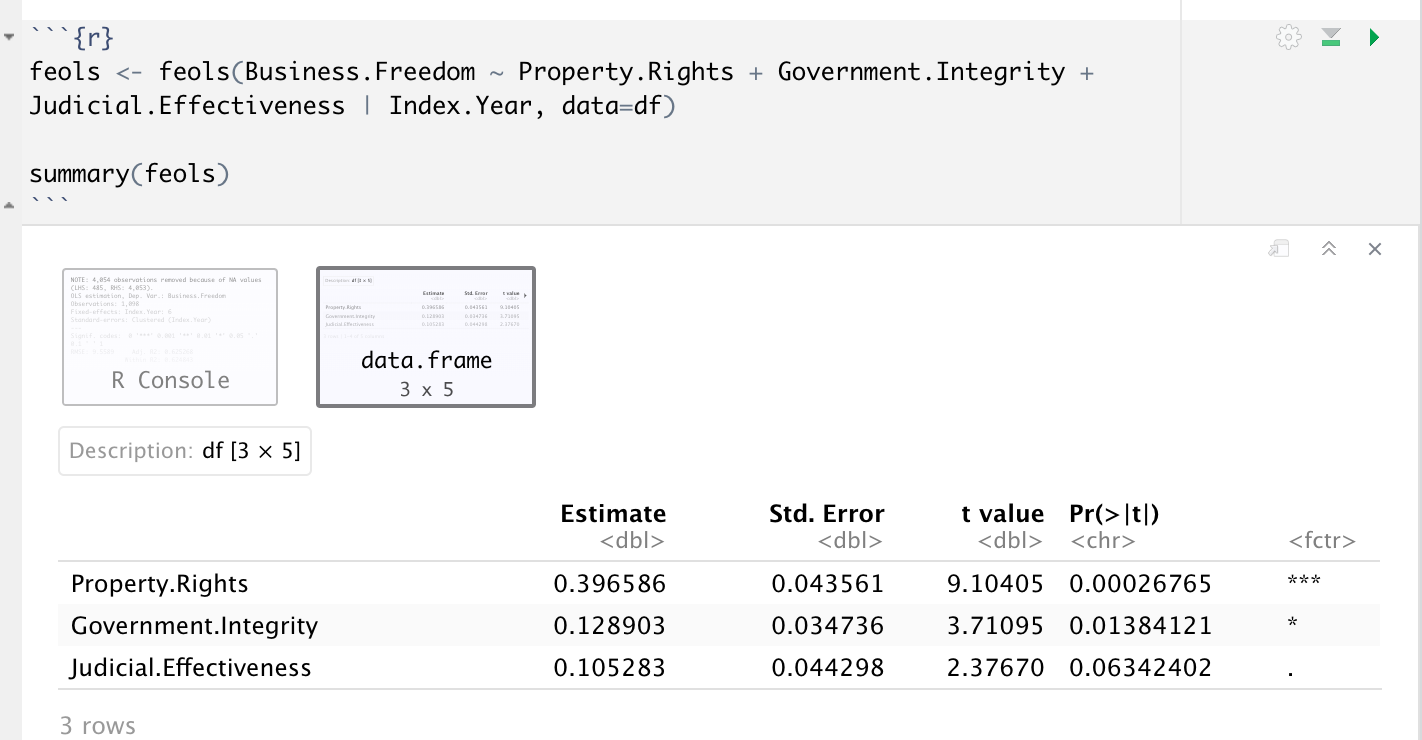

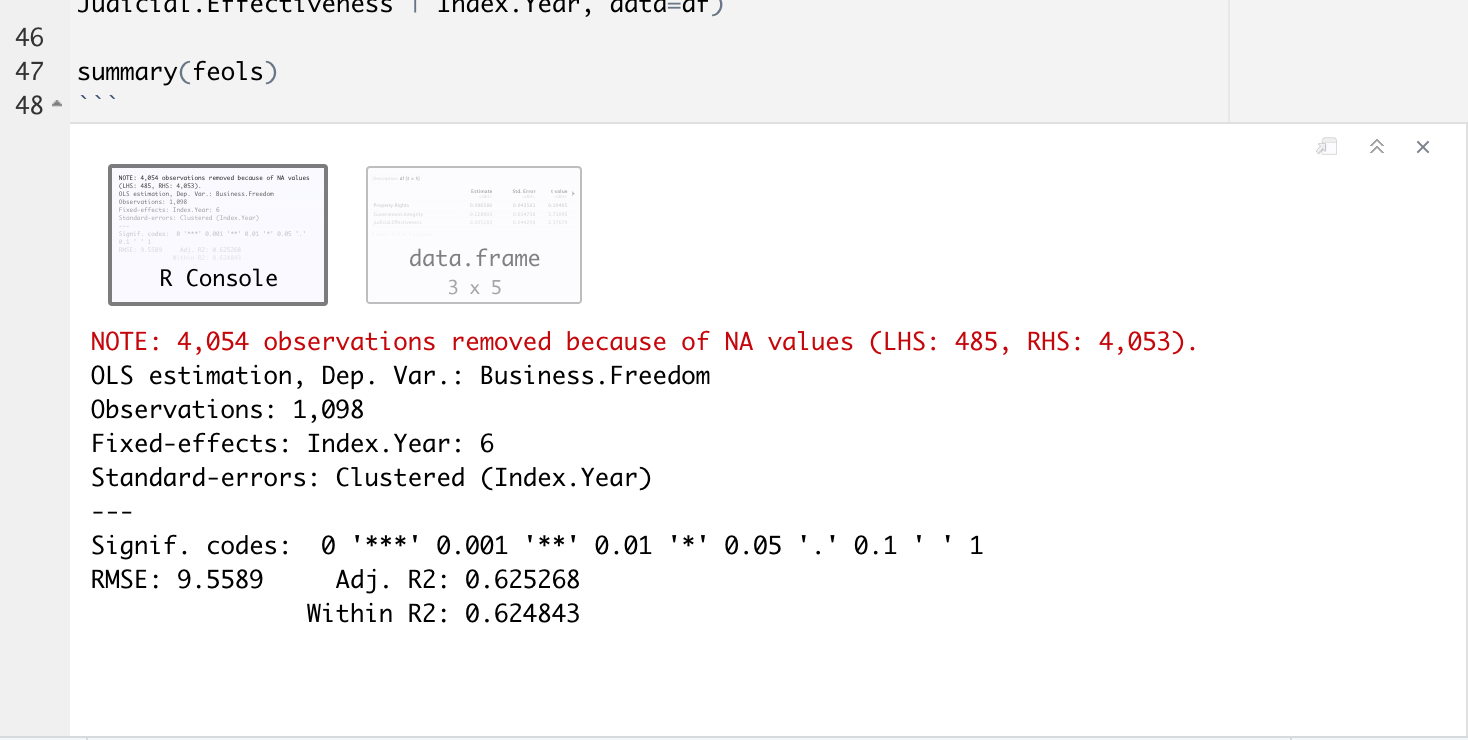

**Interpretation**: Our fixed effects model shows that controlling for time variance, only **property rights** and **government integrity** showed significant relationship with **business freedom**.

Property rights has the stronger relationship. Our adjusted R2 is also stronger.

## Adjusted R2= 0.625

## Residuals

In [14]:
df_2022 = df.query('index_year==2022')
model = smf.ols("business_freedom ~ government_integrity + property_rights", 
                data=df_2022)
results = model.fit()
results.summary()

df_2022 = df_2022.assign(
    residuals = results.resid,
    residuals_z = results.resid / results.resid.std()
)
df_2022.sort_values(by='residuals_z')

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,residuals,residuals_z
118,North Korea,2022,3.0,16.3,3.8,6.5,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,-31.073703,-3.614453
97,Malawi,2022,53.0,48.1,29.4,53.0,78.7,87.4,11.0,34.0,56.4,71.1,67.4,50.0,50.0,-20.368514,-2.369239
143,Sierra Leone,2022,52.0,43.1,32.4,41.9,86.7,84.9,54.0,34.4,38.2,65.1,63.6,60.0,20.0,-18.347113,-2.134112
99,Maldives,2022,47.3,47.2,43.1,32.1,96.9,55.2,0.0,39.8,51.6,77.2,60.0,35.0,30.0,-16.627878,-1.934133
153,Sudan,2022,32.0,22.2,14.6,13.2,84.9,92.9,0.0,25.0,44.8,13.7,48.0,5.0,20.0,-15.548996,-1.808639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Indonesia,2022,64.4,38.6,39.9,43.2,85.3,91.2,80.1,66.6,59.3,80.3,78.6,50.0,60.0,14.454561,1.681336
104,Mexico,2022,63.7,47.7,32.0,40.7,76.0,78.3,78.0,69.2,58.4,73.0,76.6,75.0,60.0,14.539551,1.691222
33,China,2022,48.0,43.7,39.3,37.4,71.2,64.2,11.1,68.8,57.2,70.0,73.2,20.0,20.0,14.561219,1.693742
17,Bolivia,2022,43.0,14.1,28.7,28.4,86.0,58.8,10.9,54.7,46.2,72.8,60.8,15.0,40.0,15.126820,1.759532


In [15]:
df_2019 = df.query('index_year==2019')
model = smf.ols("business_freedom ~ government_integrity + property_rights", 
                data=df_2019)
results = model.fit()
results.summary()

df_2019 = df_2019.assign(
    residuals = results.resid,
    residuals_z = results.resid / results.resid.std(),
)
df_2019.sort_values(by='residuals_z')

,name,index_year,overall_score,property_rights,government_integrity,judicial_effectiveness,tax_burden,government_spending,fiscal_health,business_freedom,labor_freedom,monetary_freedom,trade_freedom,investment_freedom,financial_freedom,residuals,residuals_z
674,North Korea,2019,5.9,31.6,24.4,5.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,-45.807131,-4.650487
605,Eritrea,2019,38.9,35.5,19.7,18.1,81.4,73.9,0.0,17.7,70.0,61.0,69.2,0.0,20.0,-34.379467,-3.490314
593,Cuba,2019,27.8,31.6,37.7,10.0,48.8,0.0,15.6,20.0,20.0,65.6,64.0,10.0,10.0,-32.715013,-3.321333
581,Cambodia,2019,57.8,37.4,16.7,27.6,89.7,85.9,89.1,29.9,63.0,79.4,65.4,60.0,50.0,-22.697437,-2.304317
690,Rwanda,2019,71.1,72.2,67.9,83.2,79.8,79.4,86.3,56.2,82.2,76.1,70.4,60.0,40.0,-21.111276,-2.143284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661,Micronesia,2019,51.9,7.6,36.6,26.6,92.8,0.0,98.8,57.4,71.9,85.8,80.6,35.0,30.0,16.821548,1.707778
708,Sri Lanka,2019,56.4,44.7,28.9,39.4,84.9,88.3,30.4,75.1,58.8,70.1,76.2,40.0,40.0,17.108935,1.736954
717,Thailand,2019,68.3,53.7,36.4,45.9,81.3,85.8,96.5,82.5,63.9,75.2,83.0,55.0,60.0,18.941024,1.922953
692,Saint Vincent and the Grenadines,2019,65.8,36.5,50.5,63.8,71.2,74.3,85.0,76.5,73.5,82.2,66.6,70.0,40.0,19.503165,1.980024


In [16]:
df_2022[['name', 'index_year', 'residuals_z']]\
    .merge(df_2019[['name', 'index_year', 'residuals_z']], on='name', suffixes=('_2022','_2019'))\
    .assign(diff=lambda x: x.residuals_z_2022 - x.residuals_z_2019)\
    .sort_values(by='diff', ascending=False)

,name,index_year_2022,residuals_z_2022,index_year_2019,residuals_z_2019,diff
26,Cambodia,2022,0.798393,2019,-2.304317,3.102709
50,Eritrea,2022,-0.460106,2019,-3.490314,3.030208
27,Cameroon,2022,1.350704,2019,-1.218815,2.569519
32,China,2022,1.693742,2019,-0.739510,2.433252
38,Cuba,2022,-0.928449,2019,-3.321333,2.392884
...,...,...,...,...,...,...
133,Samoa,2022,-1.196204,2019,1.340576,-2.536780
132,Saint Vincent and the Grenadines,2022,-0.657604,2019,1.980024,-2.637627
98,Mauritania,2022,-1.486767,2019,1.243644,-2.730411
101,Micronesia,2022,-1.109572,2019,1.707778,-2.817350
